In [29]:
import numpy as np
import matplotlib.pyplot as plt

# Exercise 1

/tmp/ipykernel_122316/1510907388.py:5: RuntimeWarning: invalid value encountered in divide
  S1 = lambda x : np.abs(-2j*np.sin(np.pi*(7-x))/(1-np.exp(1j*np.pi*(7-x)/16)))


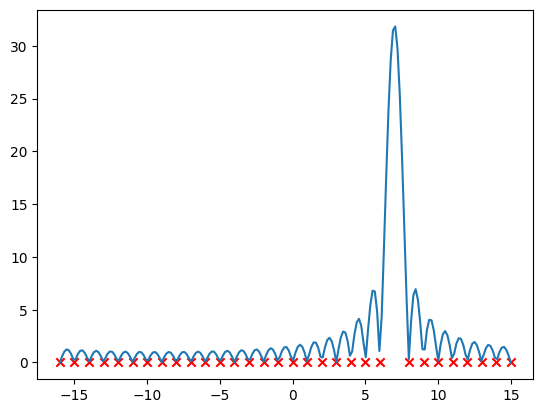

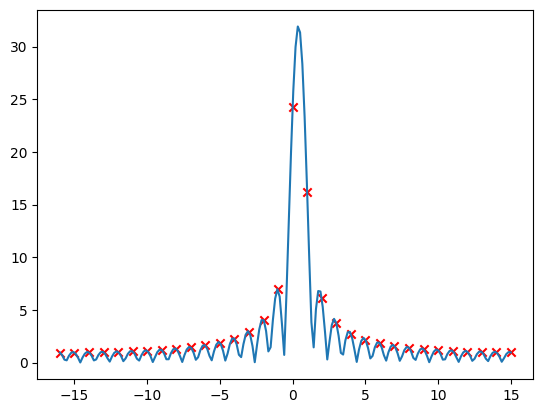

In [30]:
N = 16
x = np.linspace(-N, (N-1), 200)
k = np.linspace(-N, (N-1), 2*N)

S1 = lambda x : np.abs(-2j*np.sin(np.pi*(7-x))/(1-np.exp(1j*np.pi*(7-x)/16)))

plt.plot(x,S1(x))
plt.scatter(k,S1(k), marker="x", c="r")
plt.show()

S2 = lambda x : np.abs(-2j*np.sin(np.pi*(32/5-x))/(1-np.exp(1j*np.pi*(2/5-x)/16)))

plt.plot(x,S2(x))
plt.scatter(k,S2(k), marker="x", c="r")
plt.show()


# Exercise 2

# Exercise 3

### Question 1

The coefficients $h_n$ are given by the inverse Fourier transform:
$$
h_n = \int_{-1/2}^{1/2} H(\lambda) e^{2i\pi n\lambda} d\lambda = \int_{-1/4}^{1/4} 1 \cdot e^{2i\pi n\lambda} d\lambda
$$
* Case 1: $n = 0$
$$
h_0 = \int_{-1/4}^{1/4} e^0 d\lambda = \frac{1}{2}
$$
* Case 2:  $n \neq 0$
\begin{align*}
h_n & = \left[ \frac{e^{2i\pi n\lambda}}{2i\pi n} \right]_{-1/4}^{1/4} \\ & = \frac{e^{2i\pi n(1/4)} - e^{2i\pi n(-1/4)}}{2i\pi n} \\ & = \frac{e^{i\pi n/2} - e^{-i\pi n/2}}{2i\pi n} \\ & = \frac{\sin(\pi n/2)}{\pi n}
\end{align*}

Moreover, we have 
$$
 \frac{\sin(\pi n/2)}{\pi n} \sim_{n \to 0} \frac{\pi n/2}{\pi n} \sim_{n \to 0} \frac{1}{2} = h_0.
$$
Therefore, the expression is valid for all $n \in \mathbb{Z}$:
$$
h_n = \frac{\sin(\pi n/2)}{\pi n}.
$$

### Question 2

For $N = 15$, we keep the coefficients $h_n$ for $n \in [-7, 7]$. We denote $h^{tr}$ this truncated filter. To make it causal, we need to move it's center from $0$ to $7$ such that no negative indices are left. One causal version is thus $g_n = h_{n-7}$ for $n \in [0,14]$ and $g_n = 0$ otherwise. The time-shifting property of the Fourier transform then tells us $G(\lambda) = H^{tr}(\lambda)  e^{-2i \pi 7 \lambda}$. This is a phase shift by $-14 \pi \lambda$, which is linear in $\lambda$ (no phase distortion). Subsequently, $H^{tr}$ is real since $h^{tr}$ is even, thus $\arg(H^{tr}) = 0$ if $H^{tr}$ is positive and $\pi$ otherwise, thus it is piecewise-constant. Combining these two arguments, the total phase of $g_n$ is $\arg(H^{tr}) - 14 \pi \lambda$ which is piecewise-linear.





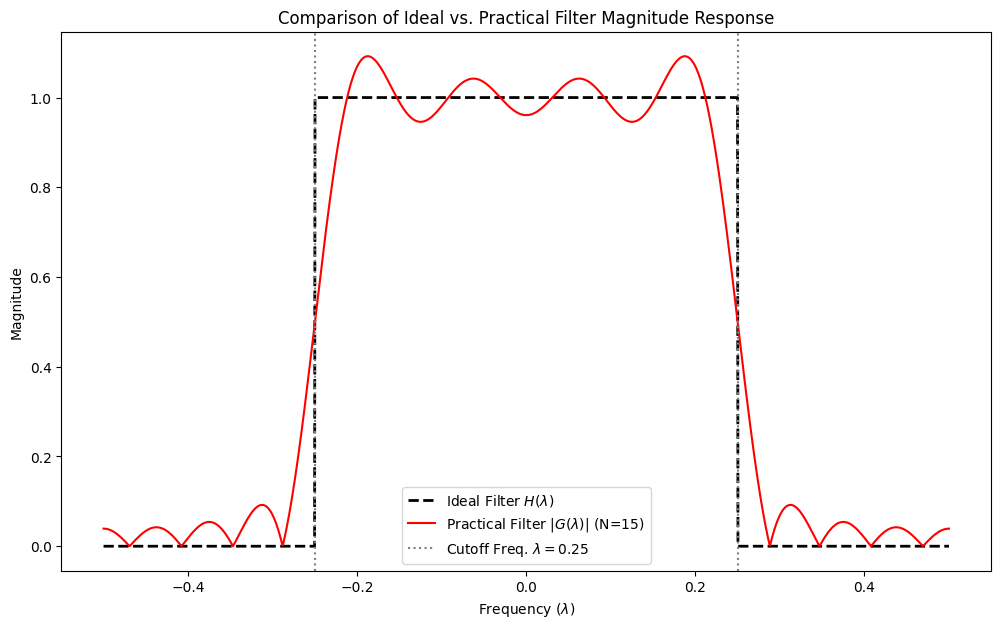

In [31]:

lam = np.linspace(-0.5, 0.5, 2000)

H_ideal = np.where(np.abs(lam) <= 0.25, 1.0, 0.0)

N_val = 15
M = (N_val - 1) // 2  
n_vals = np.arange(-M, M + 1) 

h_n = 0.5 * np.sinc(n_vals / 2.0)


outer_prod = n_vals[:, None] * lam[None, :]  
exp_matrix = np.exp(-2j * np.pi * outer_prod) 


H_tr = np.dot(h_n, exp_matrix) 

G_mod = np.abs(H_tr)

plt.figure(figsize=(12, 7))
plt.plot(lam, H_ideal, 'k--', lw=2, label='Ideal Filter $H(\\lambda)$')
plt.plot(lam, G_mod, 'r-', label=f'Practical Filter $|G(\\lambda)|$ (N={N_val})')

plt.axvline(x=0.25, color='gray', linestyle=':', label='Cutoff Freq. $\\lambda = 0.25$')
plt.axvline(x=-0.25, color='gray', linestyle=':')

plt.title('Comparison of Ideal vs. Practical Filter Magnitude Response')
plt.xlabel('Frequency ($\\lambda$)')
plt.ylabel('Magnitude')
plt.legend()
    

Modulus-wise, we have $\lvert G(\lambda) \rvert = \lvert H^{tr}(\lambda) \rvert$. We denote $w_n$ the window filter defined by $w_n = 1$ for $n \in [-7,7]$ and $0$ otherwis. We have $h^{tr}_n = h_n w_n$. Thus, $H^{tr} = H * W$ is the convulotion of $H$ and this window kernel. Using analog computations as for question 1, we get

$$
W(\lambda) = \frac{\sin(15 \pi \lambda)}{\sin(\pi \lambda)}.
$$

This explains the plot :

* The ideal filter $H$ is a perfect rectangle.
* The practical finite impulse response filter is that perfect rectangle convoluted (so locally averaged) by the kernel $W$.
* This kernel has a main lobe centered at $\lambda = 0$ and many slowly decaying side lobes.
* The sharp vertical transitions of $H$ at $\pm 1/4$ are blurred by the main lobe of $W$. This create the sloped transition, which width is dictated by $N$ (here $15$). It's height is constant (Gibbs phenomenon) of about $9 \%$ of the ideal peak (here $1$).
* The side lobes of $W$ are the cause of all the ripples.

### Question 4

Comment : We first solve this question to reuse it's results for the particular case of question 3.

Let $h_n$ be a real filter defined for $0 \geq n \geq P$ s.t $h_{P-n} = h_n$.
The Fourier transform of $h_n$ is:

\begin{align*}
H(\lambda) = \sum_{n=0}^{P} h_n e^{-2i\pi n\lambda}
H(\lambda) &= e^{-i\pi P\lambda} \sum_{n=0}^{P} h_n e^{-2i\pi n\lambda} e^{i\pi P\lambda} \\
&= e^{-i\pi P\lambda} \sum_{n=0}^{P} h_n e^{i\pi (P-2n)\lambda}
\end{align*}

We can write this as $H(\lambda) = e^{-i\pi P\lambda} A(\lambda)$, with
$$
A(\lambda) = \sum_{n=0}^{P} h_n e^{i\pi (P-2n)\lambda}
$$
We will prove that $H(\lambda)$ has a linear phase by showing that $A(\lambda)$ is a real-valued function.
\begin{align*}
\overline{A(\lambda)} &= \overline{\left( \sum_{n=0}^{P} h_n e^{i\pi (P-2n)\lambda} \right)} \\
&= \sum_{n=0}^{P} h_n e^{-i\pi (P-2n)\lambda}
\end{align*}
Let $k = P - n \Longrightarrow n = P - k$. The summation limits remain from $k=0$ to $P$.
\begin{align*}
\overline{A(\lambda)} &= \sum_{k=0}^{P} h_{P-k} e^{-i\pi (P-2(P-k))\lambda} \\
&= \sum_{k=0}^{P} h_{k} e^{-i\pi (P-2P+2k)\lambda} \\
&= \sum_{k=0}^{P} h_{k} e^{-i\pi (-P+2k)\lambda} \\
&= \sum_{k=0}^{P} h_{k} e^{i\pi (P-2k)\lambda} = A(\lambda)
\end{align*}


The phase of $H(\lambda)$ is thus :
\begin{align*}
\phi(\lambda) &= \text{arg}\left(A(\lambda) e^{-i\pi P\lambda}\right) \\
&= \text{arg}(A(\lambda)) + \text{arg}(e^{-i\pi P\lambda}) \\
&= \text{arg}(A(\lambda)) - \pi P\lambda
\end{align*}
Since $A(\lambda)$ is real, $\text{arg}(A(\lambda))$ is either $0$ or $\pi$. Therefore, $\phi(\lambda)$ is a piecewise linear function of $\lambda$.

### Question 3


To transform $\tilde{h}$ in a causal filter, we translate it by $2$ using analog reasoning as for question 2. We denote $g_n = \tilde{h}_{n-2}$, which is non-zero for indices $n \in  {0,...,5}$. Let us now compute these coefficients.

In [32]:
N_val = 6
n_vals_non_causal = np.arange(-2, 4)

k = 2 * n_vals_non_causal - 1

h_tilde_n = (2 * np.sin(np.pi * k / 4)) / (np.pi * k)

print("--- Coefficients h_tilde_n ---")
for n, h in zip(n_vals_non_causal, h_tilde_n):
    print(f"h_tilde_{n} = {h:.6f}")

--- Coefficients h_tilde_n ---
h_tilde_-2 = -0.090032
h_tilde_-1 = 0.150053
h_tilde_0 = 0.450158
h_tilde_1 = 0.450158
h_tilde_2 = 0.150053
h_tilde_3 = -0.090032


We observe the symmetry $\tilde{h}_n = \tilde{h}_{1-n}$ which is equivalent to $g_n = g_{5-n}$. Let us prove it analytically :

$$
    \tilde{h}_{1-n}  = \int_{-1/2}^{1/2} H(\lambda) e^{i \pi (2(1-n) -1)\lambda} d \lambda 
    = \int_{-1/2}^{1/2} H(\lambda) e^{i \pi (2n - 1)(-\lambda)} d \lambda.
$$
Using the change of variables $ u = - \lambda$, we get:
$$ \tilde{h}_{1-n}  = \int_{-1/2}^{1/2} H(-u) e^{i \pi (2(1-n) -1)u} d u = \tilde{h}_{n} \quad \text{because } H \text{ is even.} $$

Applying the result of question $4$ with $P = 5$ tells us that the phase is piecewise linear. 

Let us now plot the modulus of this practical filter.



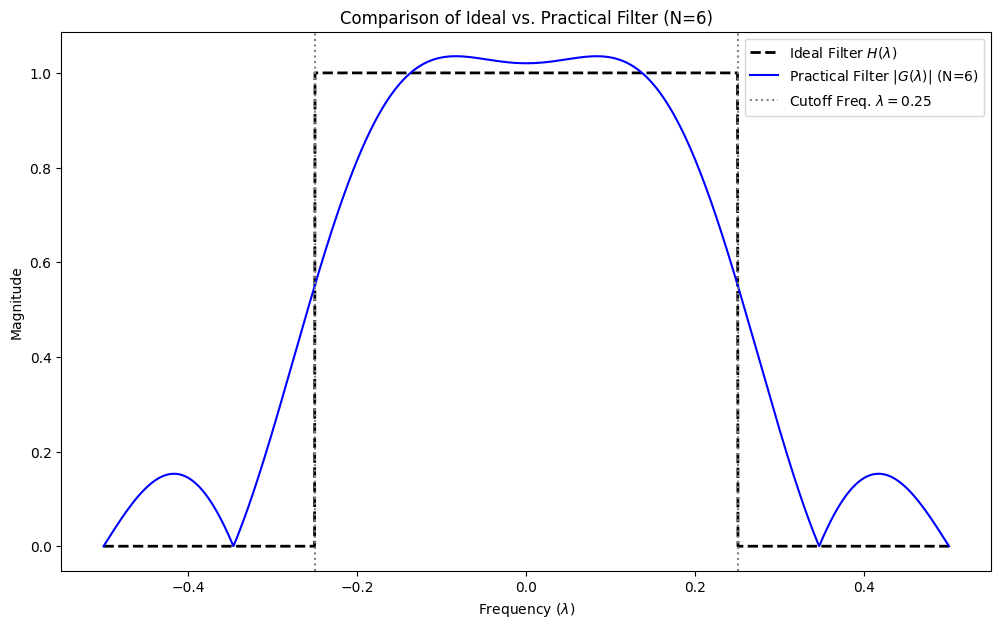

In [33]:
lam = np.linspace(-0.5, 0.5, 2000)

H_ideal = np.where(np.abs(lam) <= 0.25, 1.0, 0.0)

n_vals_causal = np.arange(N_val)
outer_prod = n_vals_causal[:, None] * lam[None, :]
exp_matrix = np.exp(-2j * np.pi * outer_prod)

G_lambda = np.dot(h_tilde_n, exp_matrix)
G_mod = np.abs(G_lambda)

plt.figure(figsize=(12, 7))
plt.plot(lam, H_ideal, 'k--', lw=2, label='Ideal Filter $H(\\lambda)$')
plt.plot(lam, G_mod, 'b-', label=f'Practical Filter $|G(\\lambda)|$ (N={N_val})')

plt.axvline(x=0.25, color='gray', linestyle=':', label='Cutoff Freq. $\\lambda = 0.25$')
plt.axvline(x=-0.25, color='gray', linestyle=':')

plt.title(f'Comparison of Ideal vs. Practical Filter (N={N_val})')
plt.xlabel('Frequency ($\\lambda$)')
plt.ylabel('Magnitude')
plt.legend()


Let us explain this plot by computing $\lvert G(\lambda) \rvert$. Applying the computations of question 4 to this filter, we have

$$
G(\lambda) = e^{-5i\pi\lambda} \underbrace{\left[ 2g_0\cos(5\pi\lambda) + 2g_1\cos(3\pi\lambda) + 2g_2\cos(\pi\lambda) \right]}_{A(\lambda)}.
$$
Thus $|G(\lambda)| =  |A(\lambda)| = | 2g_0\cos(5\pi\lambda) + 2g_1\cos(3\pi\lambda) + 2g_2\cos(\pi\lambda) | $.


The practical filter's response is an approximation of the ideal rectangle $H(\lambda)$ using a finite Fourier series. The quality is poor (large ripples, wide transition) precisely because $N=6$, limiting us to a truncation of only 3 cosine terms to build the rectangle.